# 1. Exploratory Data Analysis

# 1.1 ********************************Impact of GPA on employment********************************

In [3]:
# Reading the data
import pandas as pd
df=pd.read_csv("C:\\Users\\user\\OneDrive\\Desktop\\food.csv")

In [176]:
df.head(2)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155


In [163]:
# Checking unique values
print(df['employment'].unique())
print(df.GPA.unique())

[ 3.  2.  1. nan]
['2.4' '3.654' '3.3' '3.2' '3.5' '2.25' '3.8' '3.904' '3.4' '3.6' '3.1'
 nan '4' '2.2' '3.87' '3.7' '3.9' '2.8' '3' '3.65' '3.89' '2.9' '3.605'
 '3.83' '3.292' '3.35' 'Personal ' '2.6' '3.67' '3.73' '3.79 bitch' '2.71'
 '3.68' '3.75' '3.92' 'Unknown' '3.77' '3.63' '3.882']


In [165]:
df['GPA']=pd.to_numeric(df['GPA'], errors='coerce')
print(df.GPA.unique())

[2.4   3.654 3.3   3.2   3.5   2.25  3.8   3.904 3.4   3.6   3.1     nan
 4.    2.2   3.87  3.7   3.9   2.8   3.    3.65  3.89  2.9   3.605 3.83
 3.292 3.35  2.6   3.67  3.73  2.71  3.68  3.75  3.92  3.77  3.63  3.882]


In [166]:
df1=df[['GPA','employment']]

In [167]:
# Understanding the statistics in GPA, employment
df1.describe()

,GPA,employment
count,120.000000,116.000000
mean,3.415558,2.448276
std,0.390139,0.533158
min,2.200000,1.000000
25%,3.200000,2.000000
50%,3.500000,2.000000
75%,3.700000,3.000000
max,4.000000,3.000000


In [168]:
df1.head()

,GPA,employment
0,2.400,3.0
1,3.654,2.0
2,3.300,3.0
3,3.200,3.0
4,3.500,2.0


In [169]:
# checking null values
df1.isnull().values.any()

True

In [170]:
df1.isnull().sum()

GPA           5
employment    9
dtype: int64

In [171]:
df3=df1.dropna()

In [172]:
df3.isnull().sum()

GPA           0
employment    0
dtype: int64

In [174]:
# Checking mean by grouping employment
df3.groupby(['employment']).mean()

,GPA
employment,
1.0,3.500000
2.0,3.479017
3.0,3.351216


<AxesSubplot:xlabel='GPA', ylabel='employment'>

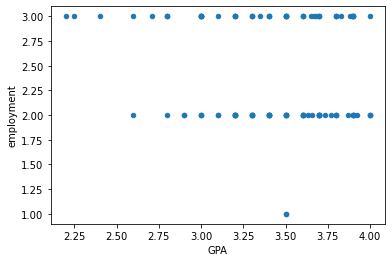

In [175]:
df3.plot(kind='scatter',x='GPA',y='employment')

In [161]:
# Making bins in gpa_range and understanding the employment effect
df4=df3.copy()
df4['gpa_range']=pd.cut(df4.GPA ,bins=[0, 3 ,3.3, 3.5, 3.75, 4] ,labels= ['low','avg','high','very_high','excellent'] )
print(df4['gpa_range'].value_counts())
t1=pd.crosstab(df4.gpa_range , df4.employment ).apply(lambda r: r/r.sum(), axis=1)
t1

excellent    24
very_high    23
high         22
low          21
avg          21
Name: gpa_range, dtype: int64


employment,1,2,3
gpa_range,,,
low,0.000000,0.333333,0.666667
avg,0.000000,0.619048,0.380952
high,0.090909,0.500000,0.409091
very_high,0.000000,0.608696,0.391304
excellent,0.000000,0.541667,0.458333


we bin the gpa in 5 bins with equal number of intstances (~20) , low(0-3), avg(3-3.3), high (3.3-3.5), very-high(3.5-3.75) ,and excellent (3.75-4) , we find the percentage of employment type 1,2 and 3 for each bracket, and see that 66% of indiviuals falling in 'low' gpa bracket are unemployed (employment type 3) compared to all other brackets where the range of unemployed is ~40-45%. Nothing else can be conclusively said about the employment for the other brackets of GPA due to either absence of enough data points or lack of clear pattern.

# 1.2 ********************************Analysis of Weight feature********************************

In [215]:
df.head(2)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155


In [218]:
# Checking unique values
df['weight'].unique()

array(['187', '155', "I'm not answering this. ", 'Not sure, 240', '190',
       '180', '137', '125', '116', '110', '264', '123', '185', '145',
       '170', '135', '165', '175', '195', '105', '160', '167', '115',
       '205', nan, '128', '150', '140', '120', '100', '113', '168', '169',
       '200', '265', '192', '118', '210', '112', '144 lbs', '130', '127',
       '129', '260', '184', '230', '138', '156'], dtype=object)

In [225]:
df2 = pd.DataFrame(df[['weight']])

In [ ]:
# As we can see that the weight column contains values with some string too like "I'm not answering this. "
# so this is wrong about the weight field as during analysis it will throw an error as it contains strings 
# In order to resolve it we will do as follows:

In [226]:
print(df2.shape[0])

125


In [233]:
df3=df2.copy()
df3=pd.DataFrame(pd.to_numeric(df2.weight , errors='coerce'))

In [238]:
# Understanding NAN
print('Na before removing string' ,df2.isna().sum(), '\n NA after removing strings' ,df3.isna().sum())

Na before removing string weight    2
dtype: int64 
 NA after removing strings weight    5
dtype: int64


In [240]:
print(df2.weight.unique())
print(df3.weight.unique())

['187' '155' "I'm not answering this. " 'Not sure, 240' '190' '180' '137'
 '125' '116' '110' '264' '123' '185' '145' '170' '135' '165' '175' '195'
 '105' '160' '167' '115' '205' nan '128' '150' '140' '120' '100' '113'
 '168' '169' '200' '265' '192' '118' '210' '112' '144 lbs' '130' '127'
 '129' '260' '184' '230' '138' '156']
[187. 155.  nan 190. 180. 137. 125. 116. 110. 264. 123. 185. 145. 170.
 135. 165. 175. 195. 105. 160. 167. 115. 205. 128. 150. 140. 120. 100.
 113. 168. 169. 200. 265. 192. 118. 210. 112. 130. 127. 129. 260. 184.
 230. 138. 156.]


<AxesSubplot:ylabel='Density'>

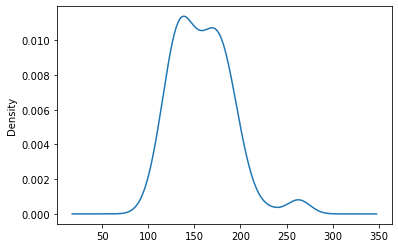

In [248]:
# Evaluating Weight feature using statistical plots
df3.weight.plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

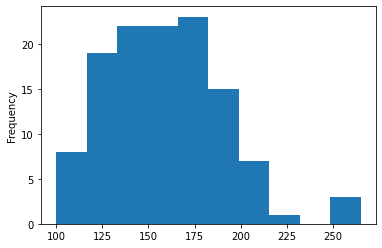

In [247]:

df3.weight.plot(kind='hist')

In [244]:
df3.weight.describe()

count    120.000000
mean     158.500000
std       31.758278
min      100.000000
25%      135.000000
50%      155.000000
75%      180.000000
max      265.000000
Name: weight, dtype: float64

Weight on its own is not a holistic indicator of body type of indivudual , it makes more sense when it is taken in accordance with height or gender of individiual. Someone who is staistically an outlier in terms of weight like lets say 80lbs can be perfectly fine for his height. So weight feaure used alone for analysis can be misleading.
From a data standpoint the weight feild contains values which are very aligned with the normal distribtuion of weight of any population. So the data does not contain anomalies. The range of weight is from 100-265 pounds and mean is around 155lbs. 
There were a couple of string values, but there numbers were not significant to throw off the analysis.


# 1.3 ********************************Analyzing comfort_food_reasons feature ********************************

In [251]:
df['comfort_food_reasons']

0                              we dont have comfort 
1                               Stress, bored, anger
2                                    stress, sadness
3                                            Boredom
4                         Stress, boredom, cravings 
                           ...                      
120                             boredom and sadness 
121                  Loneliness / Homesick / Sadness
122                                          sadness
123    happiness, they are some of my favorite foods
124                 hormones, Premenstrual syndrome.
Name: comfort_food_reasons, Length: 125, dtype: object

In [252]:
df6=df['comfort_food_reasons']

In [253]:
df6.head()

0         we dont have comfort 
1          Stress, bored, anger
2               stress, sadness
3                       Boredom
4    Stress, boredom, cravings 
Name: comfort_food_reasons, dtype: object

In [265]:
# taking a subset in comfort_food_reasons feature
df6=df6.head(50)

In [268]:
df6.shape

(50, 1)

In [272]:
# Checking null values
df6.isnull().sum()

comfort_food_reasons    0
dtype: int64

In [281]:
df6.head()

0         we dont have comfort
1         Stress, bored, anger
2              stress, sadness
3                      Boredom
4    Stress, boredom, cravings
Name: comfort_food_reasons, dtype: object

In [282]:
# Converting to dataframe
df6=pd.DataFrame(df6)

In [283]:
df6.head()

,comfort_food_reasons
0,we dont have comfort
1,"Stress, bored, anger"
2,"stress, sadness"
3,Boredom
4,"Stress, boredom, cravings"


In [285]:
cfr=[]
# checking unique values
cfr=df6['comfort_food_reasons'].unique()

In [289]:
cfr=list(df6['comfort_food_reasons'].unique())

In [299]:
for i in range(len(cfr)):
    cfr[i]=cfr[i].lower()
    cfr[i].split()

In [312]:
newlist = [word for line in cfr for word in line.split()]

In [303]:
uniqueWords = [] 
for i in newlist:
      if not i in uniqueWords:
          uniqueWords.append(i);

In [306]:
len(uniqueWords)

113

In [307]:
len(newlist)

204

In [317]:
for i in range(len(newlist)):
    newlist[i]=newlist[i].replace(',','')

In [333]:
# Understanding most occured words
from collections import Counter
Counter=Counter(newlist)
most_occur = Counter.most_common(30)


bored
sad
stress
comfort
anger
cold/weather
happiness
hunger
craving

In [ ]:
"""
we can look for keywords bored, sad ,stress , happiness as keyowrds and find if similar words are occuring 
psuedocode--

1. keywords = ['sad', 'happy', 'bored', 'stress']
2. split the comfort_food_reasons column into token and do text preprocessing like lemmatiztion, stemming, tokenization
3. we will get a tokens each row like. ['i','eat','comfort','food','when','i','am','bored']
4. we will compare each keywords with each token and get a percenatge of match ,
    like bore will match with bored, boredom with a high percentage of characters match , so we will assign 
    that jeyword to that row , where maximum pattern match is there.
5. We will add columns ['sad', 'happy', 'bored', 'stress'] to the original data where column will take value 0 or 1 , 
    based on if the keyword was present in the comfort food column.

Alternatively, instead we can do regex pattern matching to find the keyowrds in the column and if the keyowrd is found
then we set the indicator as 1 for that keyword.

Alternatively we can use topic model to Algorithmically  detrmine the frequent topics in the column and assign topics
to each row, the probability of every topic for a document can be an additional column to the existing columns.




# Making ingestible indicator columns using regex

In [ ]:
import re

df['text']=df.text.fillna('')
df['comfort_happy'],df['comfort_sad'],df['comfort_bored'],df['comfort_stress']=0,0,0,0
for idx,row in df.iterrows():
    doc=row.text
    if(re.findall('happ', doc)!=[]):
        df['comfort_happy'].loc[idx]=1
    if(re.findall('sad', doc)!=[]):
        df['comfort_sad'].loc[idx]=1
    if(re.findall('bore', doc)!=[]):
        df['comfort_bored'].loc[idx]=1
    if(re.findall('stress', doc)!=[]):
        df['comfort_stress'].loc[idx]=1

In [116]:
df[['comfort_food_reasons','comfort_happy','comfort_sad','comfort_bored','comfort_stress']]

,comfort_food_reasons,comfort_happy,comfort_sad,comfort_bored,comfort_stress
0,we dont have comfort,0,0,0,0
1,"Stress, bored, anger",0,0,1,1
2,"stress, sadness",0,1,0,1
3,Boredom,0,0,1,0
4,"Stress, boredom, cravings",0,0,1,1
...,...,...,...,...,...
120,boredom and sadness,0,1,1,0
121,Loneliness / Homesick / Sadness,0,1,0,0
122,sadness,0,1,0,0
123,"happiness, they are some of my favorite foods",1,0,0,0


# Making ingestible indicator columns using topic modeling 

In [3]:
import pandas as pd
df=pd.read_csv('food_coded.csv')

In [4]:
from nltk.tokenize import word_tokenize
import pandas as pd
from nltk.stem import *
from nltk.stem.porter import *
import re
import nltk
from nltk.corpus import stopwords
# nltk.download('wordnet')
# nltk.download('punkt')
#nltk.download('stopwords')
stemmer = PorterStemmer()
stopwords_fr=stopwords.words('english')
from nltk.stem.wordnet import WordNetLemmatizer
# def get_lemma2(word):
#     return WordNetLemmatizer().lemmatize(word)
# from nltk.stem.snowball import SnowballStemmer
# stemmer = SnowballStemmer("english")
#stemmer = SnowballStemmer("porter")

def clean_texts(text,  stem=1, lemma=1, stopword_removal=1,  punc_removal=1 ):
    if(stem==1 and lemma==1 and stopword_removal==1 and punc_removal==1  ):
    # tokenizes the word, stemms it, removes stopwords and punctuations and convert all to lowercase
        return [WordNetLemmatizer().lemmatize(stemmer.stem(re.sub(r'[^\w\s]','',w)) )\
            for w in word_tokenize(str(text)) if w.lower() not in stopwords_fr]

    elif(stem==1 and lemma==1 and stopword_removal==1 and punc_removal==0 ):
    # tokenizes the word, stemms it, removes stopwords and punctuations and convert all to lowercase
        return [WordNetLemmatizer().lemmatize(stemmer.stem(w)) \
            for w in word_tokenize(str(text)) if w.lower() not in stopwords_fr]


    elif(stem==0 and lemma==1 and stopword_removal==1 and punc_removal==1  ):
    # tokenizes the word, stemms it, removes stopwords and punctuations and convert all to lowercase
        return [WordNetLemmatizer().lemmatize(re.sub(r'[^\w\s]','',w)) \
            for w in word_tokenize(str(text)) if w.lower() not in stopwords_fr]
    
    elif(stem==1 and lemma==0 and stopword_removal==1 and punc_removal==1):
    # tokenizes the word, stemms it, removes stopwords and punctuations and convert all to lowercase
        return [stemmer.stem(re.sub(r'[^\w\s]','',w)) \
            for w in word_tokenize(str(text)) if w.lower() not in stopwords_fr]
    
    elif(stem==0 and lemma==0 and stopword_removal==1 and punc_removal==1):
    # tokenizes the word, stemms it, removes stopwords and punctuations and convert all to lowercase
        return [re.sub(r'[^\w\s]','',w)\
            for w in word_tokenize(str(text)) if w.lower() not in stopwords_fr]
    
    
    elif(stem==0 and lemma==0 and stopword_removal==1 and punc_removal==0  ):
    # tokenizes the word, stemms it, removes stopwords and punctuations and convert all to lowercase
        return [w for w in word_tokenize(str(text)) ]


In [5]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
import pandas as pd
import numpy as np

In [6]:
df['text']=df['comfort_food_reasons']
df['text']=df.text.str.lower() # optional step to convert text to lower case

## stemming , lemmatization, punctuation removal , stopword removal , tokemization, lowercase
df['clean_text'] = df.apply(lambda x: ' '.join(clean_texts(x['text'] )),axis=1)

text =  [' '.join(df['clean_text'])][0]

In [7]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=1,
                             stop_words='english',             
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}') 
data_vectorized = vectorizer.fit_transform(df['clean_text'])

lda_model = LatentDirichletAllocation(n_components=20, max_iter=10,learning_method='online',   
                                      random_state=100,          
                                      batch_size=128,            
                                      evaluate_every = -1,       
                                      n_jobs = -1,               
                                     )
lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)  # Model attributesd

# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
# See model parameters
pprint(lda_model.get_params())

# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}
# Init the Model
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(data_vectorized)

# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head()

In [122]:
data= df.text
# Create Document — Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)
# column names
topicnames = ["comfort_food_Topic" + str(i) for i in range(best_lda_model.n_components)]
# index names
docnames = ["Doc" + str(i) for i in range(len(data))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
# Styling
def color_green(val):
 color = 'green' if val > .1 else 'black'
 return 'color: {col}'.format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)
# Apply Style
df_document_topics = df_document_topic.head(5).style.applymap(color_green).applymap(make_bold)
df_document_topics

,comfort_food_Topic0,comfort_food_Topic1,comfort_food_Topic2,comfort_food_Topic3,comfort_food_Topic4,comfort_food_Topic5,comfort_food_Topic6,comfort_food_Topic7,comfort_food_Topic8,comfort_food_Topic9,dominant_topic
Doc0,0.030000,0.700000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,1
Doc1,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.770000,0.030000,0.030000,7
Doc2,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.700000,0.030000,0.030000,7
Doc3,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,7
Doc4,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.770000,0.030000,0.030000,7


In [83]:
df_with_cols= pd.concat([df.reset_index(),df_document_topic.reset_index()] , axis=1)

In [120]:
df_with_cols[['comfort_food_reasons','comfort_food_Topic1','comfort_food_Topic2','comfort_food_Topic3',
              'comfort_food_Topic4','comfort_food_Topic5','dominant_topic']]

,comfort_food_reasons,comfort_food_Topic1,comfort_food_Topic2,comfort_food_Topic3,comfort_food_Topic4,comfort_food_Topic5,dominant_topic
0,we dont have comfort,0.70,0.03,0.03,0.03,0.03,1
1,"Stress, bored, anger",0.03,0.03,0.03,0.03,0.03,7
2,"stress, sadness",0.03,0.03,0.03,0.03,0.03,7
3,Boredom,0.05,0.05,0.05,0.05,0.05,7
4,"Stress, boredom, cravings",0.03,0.03,0.03,0.03,0.03,7
...,...,...,...,...,...,...,...
120,boredom and sadness,0.03,0.03,0.03,0.03,0.03,7
121,Loneliness / Homesick / Sadness,0.03,0.03,0.03,0.03,0.03,7
122,sadness,0.05,0.05,0.05,0.05,0.05,7
123,"happiness, they are some of my favorite foods",0.03,0.03,0.03,0.03,0.03,6


the above data shows, the probability of a comfort_food_reasons falling into one of seven topics. This can be directly used in modelling

# 1.4 ********************************Insights in data********************************


In [1]:
import pandas as pd
df=pd.read_csv('food_coded.csv')

In [2]:
df.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [23]:
# Understanding the unique columns
col_list=[]
for col in df.columns:
    if( df[col].nunique()<10):
        print(col, df[col].unique())
        col_list.append(col)

Gender [2 1]
breakfast [1 2]
calories_chicken [430 610 720 265]
calories_day [nan  3.  4.  2.]
calories_scone [315. 420. 980.  nan]
coffee [1 2]
comfort_food_reasons_coded [ 9.  1.  2.  4.  3.  7.  6.  5.  8. nan]
cook [ 2.  3.  1.  5.  4. nan]
comfort_food_reasons_coded.1 [9 1 2 4 3 7 6 5]
cuisine [nan  1.  3.  2.  6.  4.  5.]
diet_current_coded [1 2 3 4]
drink [ 1.  2. nan]
eating_changes_coded [1 3 2 4]
eating_out [3 2 1 5 4]
employment [ 3.  2.  1. nan]
ethnic_food [1 4 5 2 3]
exercise [ 1.  2.  3. nan]
father_education [ 5.  2.  4.  1.  3. nan]
fav_cuisine_coded [3 1 6 4 5 7 2 8 0]
fav_food [ 1.  3.  2. nan]
fries [2 1]
fruit_day [5 4 2 3 1]
grade_level [2 4 3 1]
greek_food [5 4 2 3 1]
ideal_diet_coded [8 3 6 2 7 1 5 4]
income [ 5.  4.  6.  1.  3.  2. nan]
indian_food [5 4 2 1 3]
italian_food [5 4 3]
marital_status [ 1.  2.  4. nan]
mother_education [ 1.  4.  2.  5.  3. nan]
nutritional_check [5 4 2 3 1]
on_off_campus [ 1.  2.  3.  4. nan]
parents_cook [1 2 3 5]
pay_meal_out [2 4 

In [25]:
t=df[col_list].corr()

In [55]:
# Understanding correlation between columns
d= pd.DataFrame(columns=['column1','column2', 'correlation'])
i=0
for col in col_list[0: int(len(col_list)/2)]:
    for col1 in col_list[int(len(col_list)/2):]:
        if col!=col1:
            corr=round(t.iloc[t.index==col][col1].values[0] ,2)
            if(abs(corr)>0.3):
                d=d.append(dict(zip( ['column1','column2', 'correlation'],
                                 [col,col1, corr])) , True)


In [56]:
d

,column1,column2,correlation
0,calories_chicken,tortilla_calories,0.38
1,calories_chicken,turkey_calories,0.40
2,calories_chicken,waffle_calories,0.35
3,calories_day,nutritional_check,0.36
4,calories_day,vitamins,-0.34
5,calories_scone,waffle_calories,0.36
6,ethnic_food,greek_food,0.55
7,ethnic_food,indian_food,0.62
8,ethnic_food,persian_food,0.59
9,ethnic_food,thai_food,0.68


Contracdictory food items have a negative correlation as per the coded values in the data, for example, 
1. fries and vitamins have inverse correlation of -0.32, as in people who prefer fries in diet are likely to consume less vitamins, 
2. 'calories per day' and 'vitamins' have inverse coorleation, as in people who have high calories intake are likely to consume less vitamins.
3. excercise and sports have high correlation which is likely as fiteness freak people are inclined to take up sports or excersise or both.
4. ethnic food has high correlation with all sorts of ethnic food , like, greek food , indian food, persian food, thaoi food. That is how the data is coded.

#  Random forest model to predict 'eating out'

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
col_list_train= [x for x in col_list if x!='eating_out']
df=df.fillna(0)
target=['eating_out']
X_train, y_train = df[col_list_train][0:100], df[target][0:100]
X_test,y_test= df[col_list_train][50:], df[target][50:]
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X, y)


<ipython-input-81-ab741fa71e4a>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, y)


RandomForestClassifier(max_depth=2, random_state=0)

In [82]:
# Performance metrics
print(f'Final Training Accuracy: {rf.score(X_train,y_train)*100}%')
print(f'Model Accuracy: {rf.score(X_test,y_test)*100}%')


Final Training Accuracy: 52.0%
Model Accuracy: 42.66666666666667%


In [79]:
# Understanding important features
t1=pd.DataFrame(columns=['column','feature_imp'])
t1.column, t1.feature_imp= col_list_train, rf.feature_importances_
t1.sort_values(by='feature_imp',ascending=False)[0:10]

,column,feature_imp
8,comfort_food_reasons_coded.1,0.108156
31,parents_cook,0.099315
16,father_education,0.071103
6,comfort_food_reasons_coded,0.064894
9,cuisine,0.053161
14,ethnic_food,0.052565
25,indian_food,0.045467
24,income,0.031778
17,fav_cuisine_coded,0.031587
38,tortilla_calories,0.030041


A random forest model that predicts the 'eating out' variable based on all other variables that have categories fewer than 10 , gives out feature importances that shows that comfort_food_reasons is highly associated with the probability that a student is likely to eat out. Other than this 'parents_cook' has second highest association with 'eating_out'.

# Summary

The approach was to try out the basic approaches with data such as data cleaning techniques, data pre-processing techniques
and moreover experimenting with new ways by trying out some metrics tests over data. There was no such predefined 
approach though I followed the basic practices for data analysis, I did some modelling too and tried some statistical 
methods as well so as to pull out insights from the data

# Challenges

Challenges:

The main challenge was the unstructered data, some columns required lot of data cleaning. Many columns had open ended values, which required precise level of analysis. In unstructured data for example there were Nan values, unnecessary string, redundant characters were present. Lot of feature engineering was done for the same.

# Conclusion

Conclusion:

Overall this dataset was a bit challenging but useful in some way for doing analysis. Some insights were drawn from the data.
The dataset required lot of cleaning and feature engineering. Overall it is quite a learning experience, which helped to think
on alll verticals related to statstical and predictive analysis of data. 